## Clustering & PCA Assignment

Our main task is to cluster the countries using some socio-economic and health factors that determine the overall development of the country

### Importing the data and doing EDA

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Importing all datasets
country_data = pd.read_csv("Country-data.csv")

In [3]:
print(len(country_data))


167


In [4]:
# Let's see the head of our master dataset
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
#Na Handling
country_data.isnull().values.any()
country_data.isnull().values.sum()
#It means there are no na values

0

### Data Preparation

### Dropping the non pca column

In [8]:
# We should drop non continuous variable
country_data_pca = country_data.drop(['country'], 1)

In [9]:
country_data_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
country_data_pca.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Checking for Outliers

In [11]:
# Checking for outliers in the continuous variables

In [12]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_data_pca.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


From the distribution shown above, you can see that there no outliner in your data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

In [13]:
# Checking the percentage of missing values
round(100*(country_data_pca.isnull().sum()/len(country_data_pca.index)), 2)

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### Scaling the Country data

In [14]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_data_pca_std = standard_scaler.fit_transform(country_data_pca)

In [15]:
country_data_pca_std.shape

(167, 9)

In [16]:
#convert  numpay array to dataframe
normalised_df = pd.DataFrame(country_data_pca_std)
normalised_df=normalised_df.set_index(country_data.country)

In [17]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [18]:
#Doing the PCA on the scaled data
pca.fit(country_data_pca_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
#Let's plot the principal components and try to make sense of them
#We'll plot original features on the first 2 principal components as axes
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [20]:
colnames = list(country_data_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(16)

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


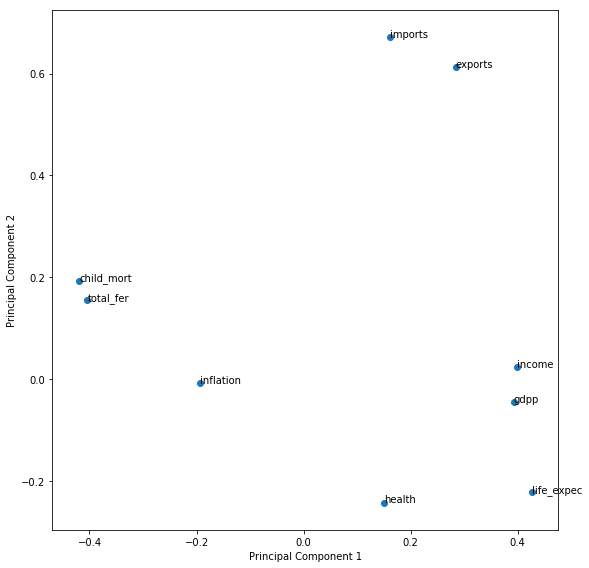

In [21]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We see that the fist component is in the direction where the 'life_expec' variables are heavy
 

#### Looking at the screeplot to assess the number of needed principal components

In [22]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

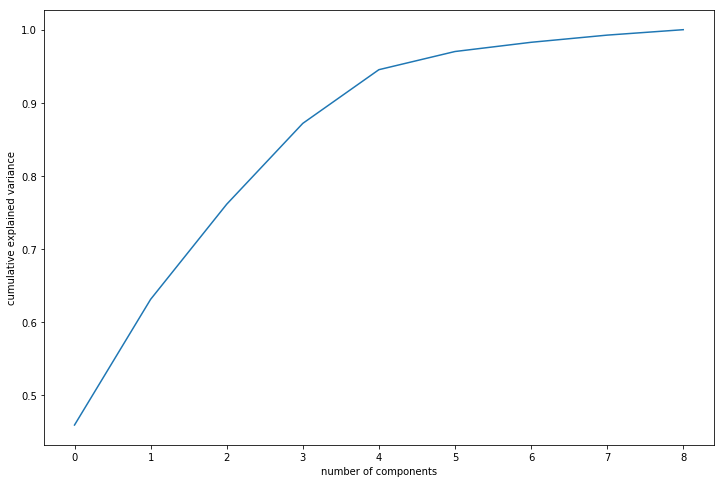

In [23]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to describe 95% of the variance in the dataset

In [24]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [25]:
pca_final

IncrementalPCA(batch_size=None, copy=True, n_components=4, whiten=False)

#### Basis transformation - getting the data onto our PCs

In [26]:
df_pca = pca_final.fit_transform(country_data_pca)
df_pca.shape

(167, 4)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [27]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

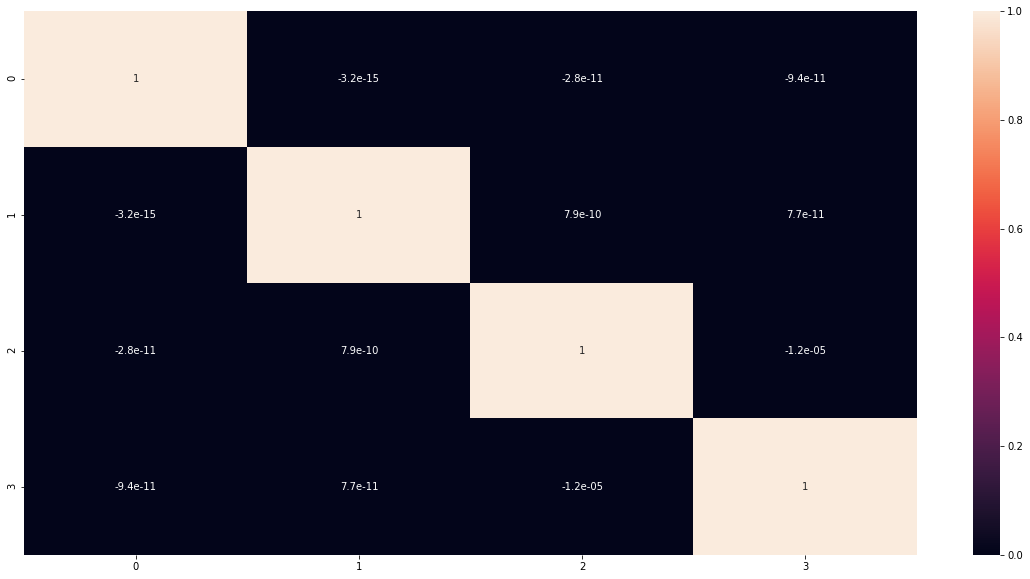

In [28]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [29]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 7.89678592822935e-10 , min corr:  -1.2409147965959278e-05



- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [30]:
#Applying selected components 
df_test_pca = pca_final.transform(country_data_pca_std)
df_test_pca.shape

(167, 4)

In [31]:
# Getting PCA dataframe after choosing 4 components
pca_f = PCA(n_components=4) 
pca_arr = pca_f.fit_transform(country_data_pca_std)
df_pca_final = pd.DataFrame(pca_arr)
pca_df = pd.DataFrame({'country':country_data['country'],'PC1':df_pca_final[0],'PC2':df_pca_final[1],'PC3':df_pca_final[2],
                       'PC4':df_pca_final[3]})
pca_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255
1,Albania,0.429911,-0.588156,-0.333486,-1.161059
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115
3,Angola,-2.932423,1.695555,1.525044,0.839625
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063


# Outlier Analysis

In [32]:
# Outlier Analysis
# Checking outliers at 25%,50%,75%,90%,95% and 99%
pca_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,PC1,PC2,PC3,PC4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,1.329608e-17,5.517875e-17,-3.008239e-17,-2.725697e-17
std,2.039748e+00,1.247262e+00,1.085096e+00,1.000389e+00
min,-4.912066e+00,-2.997364e+00,-2.714085e+00,-1.595199e+00
25%,-1.382270e+00,-7.520480e-01,-5.218776e-01,-7.837847e-01
50%,2.240726e-02,-9.449868e-02,-2.456059e-01,-3.118565e-01
75%,1.224328e+00,5.534747e-01,4.025451e-01,7.107253e-01
90%,2.462315e+00,1.290226e+00,1.283307e+00,1.217046e+00
95%,3.103798e+00,1.719312e+00,1.813777e+00,1.791681e+00
99%,4.766264e+00,4.794168e+00,3.285809e+00,2.785681e+00


In [33]:
#create a new data frame with the PCs and the original variables to see how they are related
colnames = list(country_data_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca_f.components_[0],'PC2':pca_f.components_[1], 'PC3':pca_f.components_[2],'PC4':pca_f.components_[3],'Feature':colnames})
pcs_df.head(16)

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.283897,0.613163,0.144761,0.003091,exports
2,0.150838,-0.243087,-0.596632,0.461897,health
3,0.161482,0.671821,-0.299927,-0.071907,imports
4,0.398441,0.022536,0.301548,0.392159,income
5,-0.193173,-0.008404,0.642520,0.150442,inflation
6,0.425839,-0.222707,0.113919,-0.203797,life_expec
7,-0.403729,0.155233,0.019549,0.378304,total_fer
8,0.392645,-0.046022,0.122977,0.531995,gdpp


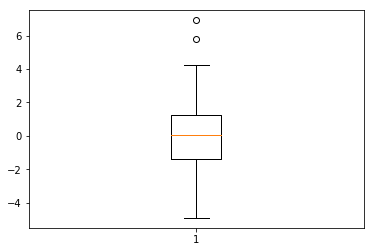

In [34]:
# outlier treatment for PC1
plt.boxplot(pca_df.PC1)
Q1 = pca_df.PC1.quantile(0.25)
Q3 = pca_df.PC1.quantile(0.75)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC1 >= Q1 - 1.5*IQR) & (pca_df.PC1 <= Q3 + 1.5*IQR)]

In [35]:
pca_df.shape

(165, 5)

In [36]:
pca_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255
1,Albania,0.429911,-0.588156,-0.333486,-1.161059
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115
3,Angola,-2.932423,1.695555,1.525044,0.839625
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063


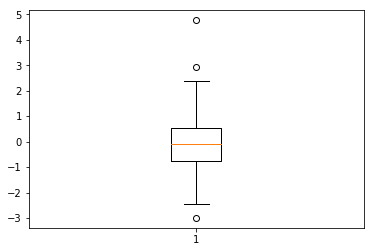

In [37]:
# outlier treatment for PC2
plt.boxplot(pca_df.PC2)
Q1 = pca_df.PC2.quantile(0.25)
Q3 = pca_df.PC2.quantile(0.75)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC2 >= Q1 - 1.5*IQR) & (pca_df.PC2 <= Q3 + 1.5*IQR)]

In [38]:
pca_df.shape

(162, 5)

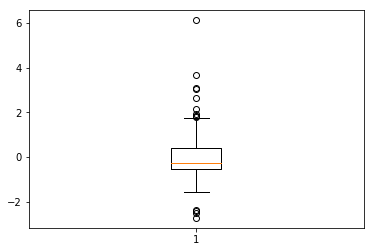

In [39]:
# outlier treatment for PC3
plt.boxplot(pca_df.PC3)
Q1 = pca_df.PC3.quantile(0.25)
Q3 = pca_df.PC3.quantile(0.75)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC3 >= Q1 - 1.5*IQR) & (pca_df.PC3 <= Q3 + 1.5*IQR)]

In [40]:
pca_df.shape

(148, 5)

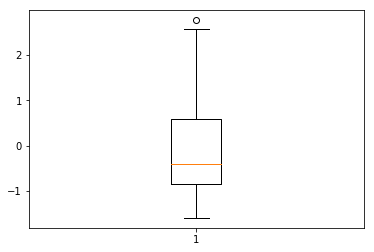

In [41]:
# outlier treatment for PC4
plt.boxplot(pca_df.PC4)
Q1 = pca_df.PC4.quantile(0.25)
Q3 = pca_df.PC4.quantile(0.75)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC4 >= Q1 - 1.5*IQR) & (pca_df.PC4 <= Q3 + 1.5*IQR)]

In [42]:
pca_df.shape

(147, 5)

In [43]:
pca_df.index = pca_df.country# Country was index set index

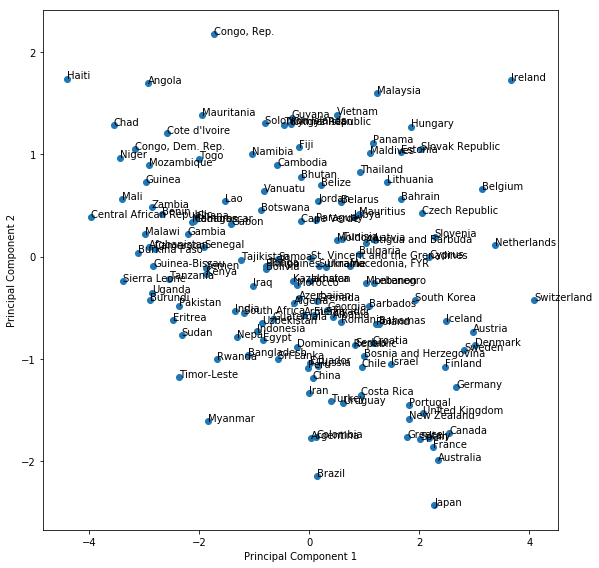

In [44]:
#scatter-plots of the PCs post outliers
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

#it shows pc1 provides max info for japan and Australia etc.
#similarly pc2 shows max info for congo , Haiti etc.

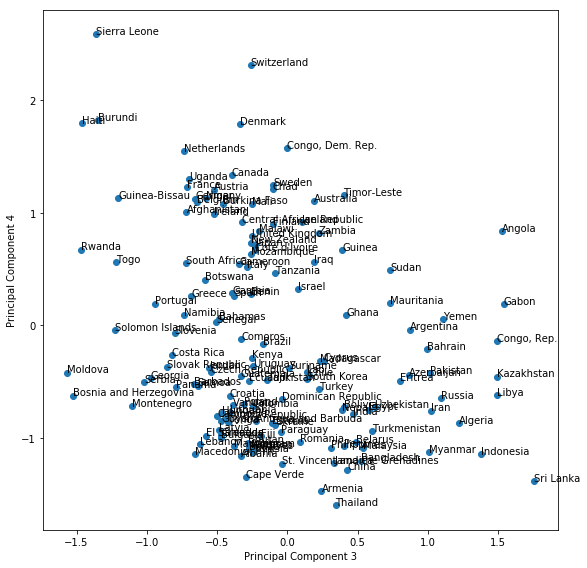

In [45]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC3, pca_df.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df.PC3[i],pca_df.PC4[i]))
plt.tight_layout()
plt.show()
#it shows pc3 provides max info for Sri Lanka.
#Similarly pc4 shows max info for Switzerland, Sierra etc.

In [46]:
# Please note pca_df will be our final dataframe on which I am going to do clustering
#Hopkins Statistics:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [47]:
#dropping country feature to do hopkins analysis
pca_df =pca_df.drop("country",axis=1)

In [48]:
pca_df.head()

,PC1,PC2,PC3,PC4
country,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255
Albania,0.429911,-0.588156,-0.333486,-1.161059
Algeria,-0.285225,-0.455174,1.221505,-0.868115
Angola,-2.932423,1.695555,1.525044,0.839625
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063


In [49]:
hopkins(pca_df)
#it shows we can perform k means on the given data set

0.7100801104920741

In [50]:
#perform silhouette and elbow analysis to determine optimal clusters
#Silhouette Analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_df)
    sse_.append([k, silhouette_score(pca_df, kmeans.labels_)])

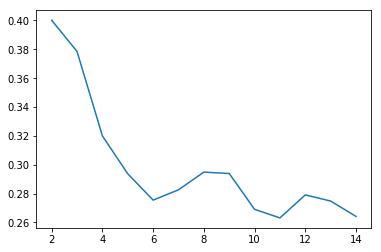

In [51]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

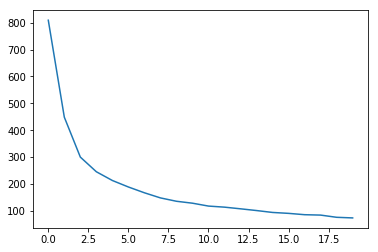

In [52]:
#elbow Analysis
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [53]:
#It seems 4 cluster are optimal choice
# K means with k=4

model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
#
pca_df=pca_df.reset_index()

In [55]:

pca_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255
1,Albania,0.429911,-0.588156,-0.333486,-1.161059
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115
3,Angola,-2.932423,1.695555,1.525044,0.839625
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063


In [56]:
# analysis of clusters formed
pca_df.index = pd.RangeIndex(len(pca_df.index))
pca_km = pd.concat([pca_df, pd.Series(model_clus5.labels_)], axis=1)
pca_km.columns = ['country','PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']

In [57]:
pca_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,1
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,2
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0
3,Angola,-2.932423,1.695555,1.525044,0.839625,1
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,2


In [58]:
#Join back the clustered data with dataset post step1.  Perform mean analysis for all columns per cluster
merged_pca=pca_km.merge(country_data,how='left')
merged_pca.head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.932423,1.695555,1.525044,0.839625,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,2,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [59]:
merged_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 15 columns):
country       147 non-null object
PC1           147 non-null float64
PC2           147 non-null float64
PC3           147 non-null float64
PC4           147 non-null float64
ClusterID     147 non-null int32
child_mort    147 non-null float64
exports       147 non-null float64
health        147 non-null float64
imports       147 non-null float64
income        147 non-null int64
inflation     147 non-null float64
life_expec    147 non-null float64
total_fer     147 non-null float64
gdpp          147 non-null int64
dtypes: float64(11), int32(1), int64(2), object(1)
memory usage: 17.8+ KB


In [60]:
km_clusters_child_mort = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).gdpp.mean())

In [61]:
km_clusters_imports.head()

,imports
ClusterID,
0,29.365633
1,39.660000
2,58.274510
3,41.556522


In [62]:

df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean", "inflation_mean", "life_expec_mean","total_fer_mean","gdpp_mean"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
ClusterID          4 non-null int64
child_mort_mean    4 non-null float64
exports_mean       4 non-null float64
health_mean        4 non-null float64
imports_mean       4 non-null float64
income_mean        4 non-null float64
inflation_mean     4 non-null float64
life_expec_mean    4 non-null float64
total_fer_mean     4 non-null float64
gdpp_mean          4 non-null float64
dtypes: float64(9), int64(1)
memory usage: 400.0 bytes


In [63]:
df.info

<bound method DataFrame.info of    ClusterID  child_mort_mean  exports_mean  health_mean  imports_mean  \
0          0        29.927273     26.690576     5.475152     29.365633   
1          1        94.397500     27.252750     6.115000     39.660000   
2          2        16.725490     50.003922     6.777843     58.274510   
3          3         4.134783     43.443478     9.991739     41.556522   

    income_mean  inflation_mean  life_expec_mean  total_fer_mean     gdpp_mean  
0  10476.969697       10.549879        72.118182        2.570303   5101.090909  
1   2838.325000        9.792125        59.057500        5.088250   1367.125000  
2  13772.156863        4.229314        73.413725        2.105490   7854.235294  
3  38130.434783        1.067652        80.878261        1.772174  41852.173913  >

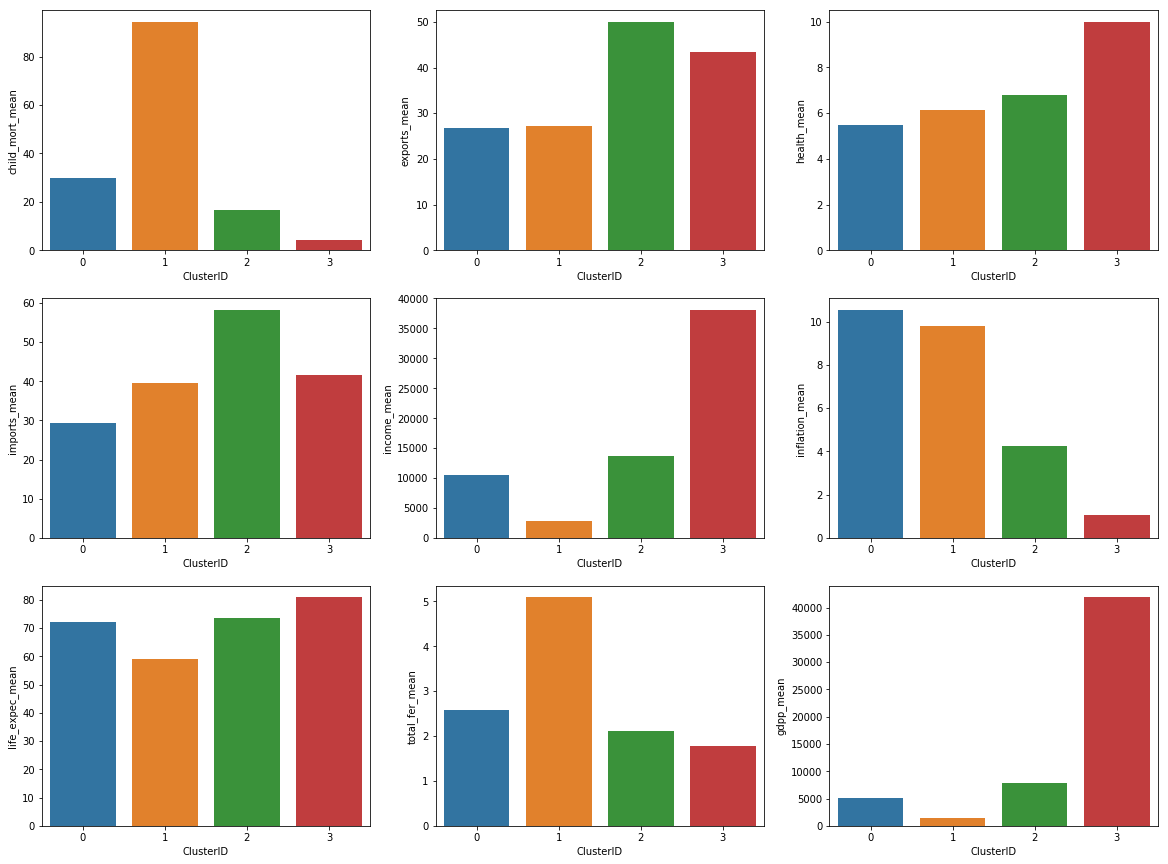

In [64]:
plt.figure(figsize=(20,15))
# subplot 1
plt.subplot(3, 3, 1)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
sns.barplot(x=df.ClusterID, y=df.exports_mean)

# subplot 3
plt.subplot(3, 3, 3)
sns.barplot(x=df.ClusterID, y=df.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
sns.barplot(x=df.ClusterID, y=df.imports_mean)
plt.subplot(3, 3, 5)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(3, 3, 6)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)
plt.subplot(3, 3, 7)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.subplot(3, 3, 8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(3, 3, 9)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.show()

In [65]:
#let say if we are going to invest in the cluster where child mortaility is maximum and income is lowest
#we choose cluster 1
#Lets verify data of some countries
merged_pca[merged_pca['ClusterID']==1]

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,1,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
3,Angola,-2.932423,1.695555,1.525044,0.839625,1,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
17,Benin,-2.672314,0.418172,-0.257368,0.278672,1,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
21,Botswana,-0.882088,0.457368,-0.584633,0.406161,1,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350
24,Burkina Faso,-3.122053,0.038775,-0.455751,1.080918,1,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
25,Burundi,-2.898971,-0.422663,-1.347413,1.821474,1,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
27,Cameroon,-2.807909,0.078649,-0.342961,0.543557,1,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
30,Central African Republic,-3.964964,0.386619,-0.323557,0.918301,1,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
31,Chad,-3.557555,1.289128,-0.103015,1.208406,1,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
35,Comoros,-2.093556,0.343601,-0.328381,-0.118947,1,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769


In [66]:
#lets do the k mean with different cluseter no. ie k=5
# K means with k=5
pca_df.index=pca_df.country
pca_df =pca_df.drop("country",axis=1)
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
#reset the index to enable the joining pca clusters to initial data
pca_df=pca_df.reset_index()

In [68]:
# analysis of clusters formed
pca_df.index = pd.RangeIndex(len(pca_df.index))
pca_km = pd.concat([pca_df, pd.Series(model_clus5.labels_)], axis=1)
pca_km.columns = ['country','PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']

In [69]:
pca_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,4
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,0
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0
3,Angola,-2.932423,1.695555,1.525044,0.839625,4
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,3


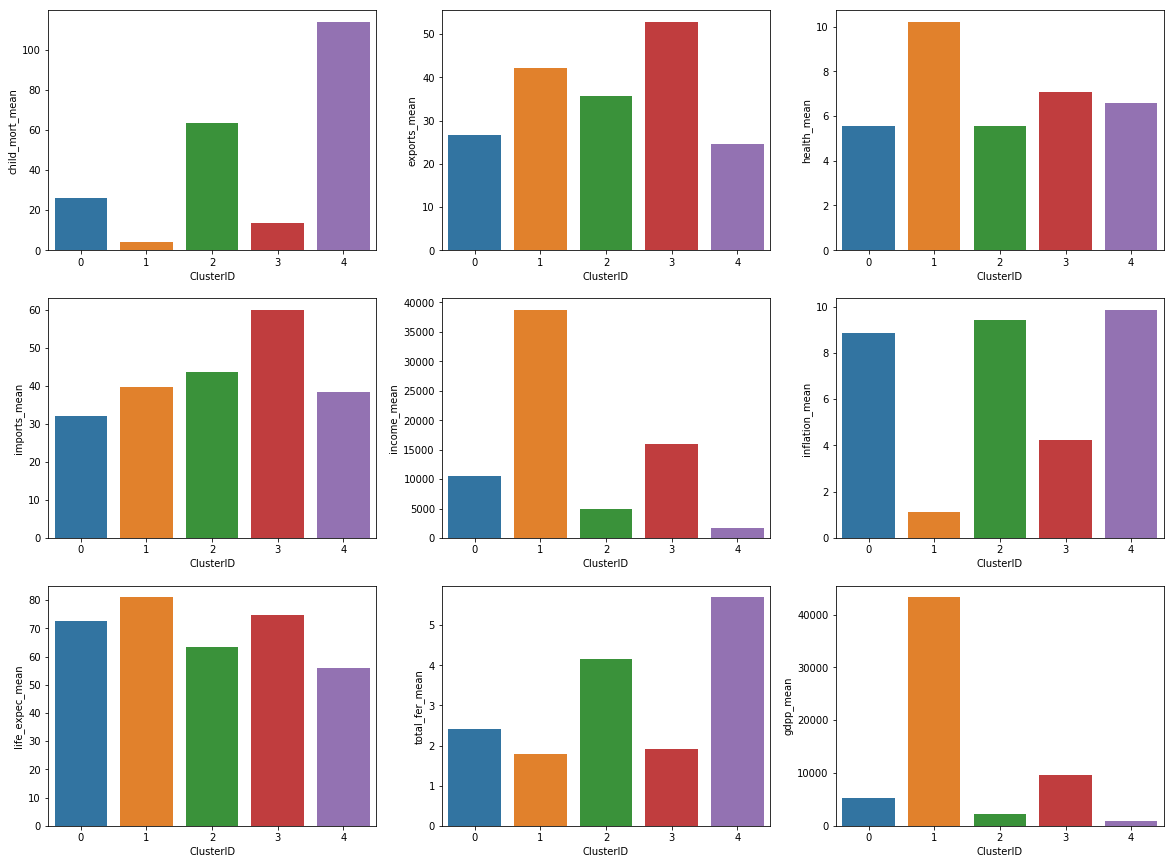

In [70]:
merged_pca=pca_km.merge(country_data,how='left')

km_clusters_child_mort = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(merged_pca.groupby(["ClusterID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean", "inflation_mean", "life_expec_mean","total_fer_mean","gdpp_mean"]


plt.figure(figsize=(20,15))
# subplot 1
plt.subplot(3, 3, 1)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
sns.barplot(x=df.ClusterID, y=df.exports_mean)

# subplot 3
plt.subplot(3, 3, 3)
sns.barplot(x=df.ClusterID, y=df.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
sns.barplot(x=df.ClusterID, y=df.imports_mean)
plt.subplot(3, 3, 5)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(3, 3, 6)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)
plt.subplot(3, 3, 7)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.subplot(3, 3, 8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(3, 3, 9)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.show()

In [493]:
#let say if we are going to invest in the cluster where child mortaility is maximum and income is lowest
#we choose cluster 3
#Lets verify data of some countries
merged_pca[merged_pca['ClusterID']==3]

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,3,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
10,Bahamas,1.268744,-0.656588,-0.488098,0.055634,3,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
11,Bahrain,1.670996,0.561162,0.991258,-0.207080,3,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700
13,Barbados,1.081374,-0.481970,-0.664355,-0.522505,3,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000
14,Belarus,0.580025,0.535327,0.486228,-1.035275,3,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030
16,Belize,0.211255,0.699243,-0.275561,-1.095627,3,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340
18,Bhutan,-0.156571,0.777396,-0.277344,-1.038650,3,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180
20,Bosnia and Herzegovina,0.995867,-0.971888,-1.528328,-0.620885,3,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610
23,Bulgaria,0.906595,0.030278,-0.471204,-0.994661,3,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840
26,Cambodia,-0.582412,0.894820,-0.498705,-0.805234,3,44.4,54.1,5.68,59.5,2520,3.120,66.1,2.88,786


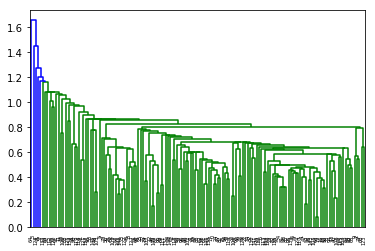

In [71]:
#Heirarchical Clustering
pca_df.index=pca_df.country
pca_df =pca_df.drop("country",axis=1)
mergings = linkage(pca_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

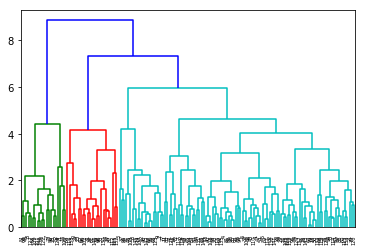

In [496]:
mergings = linkage(pca_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [74]:
#reset the index to enable the joining pca clusters to initial data
pca_df=pca_df.reset_index()
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
pca_hc = pd.concat([pca_df, clusterCut], axis=1)
pca_hc.columns = ['country','PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']

In [75]:
pca_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,0
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,0
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0
3,Angola,-2.932423,1.695555,1.525044,0.839625,1
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,0


In [76]:
#combing hc clusters to the initial data frame got in first step
merged_pca_hc=pca_hc.merge(country_data,how='left')
merged_pca_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.932423,1.695555,1.525044,0.839625,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [77]:
#Analysis of hc clusters after merging
hc_clusters_child_mort = 	pd.DataFrame(merged_pca_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(merged_pca_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(merged_pca_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(merged_pca_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(merged_pca_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(merged_pca_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(merged_pca_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(merged_pca_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(merged_pca_hc.groupby(["ClusterID"]).gdpp.mean())

In [78]:
df_hc = pd.concat([pd.Series([0,1,2,3]), hc_clusters_child_mort, hc_clusters_exports, hc_clusters_health,hc_clusters_imports,hc_clusters_income,hc_clusters_inflation,hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df_hc.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean", "inflation_mean", "life_expec_mean","total_fer_mean","gdpp_mean"]
df_hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
ClusterID          4 non-null int64
child_mort_mean    4 non-null float64
exports_mean       4 non-null float64
health_mean        4 non-null float64
imports_mean       4 non-null float64
income_mean        4 non-null float64
inflation_mean     4 non-null float64
life_expec_mean    4 non-null float64
total_fer_mean     4 non-null float64
gdpp_mean          4 non-null float64
dtypes: float64(9), int64(1)
memory usage: 400.0 bytes


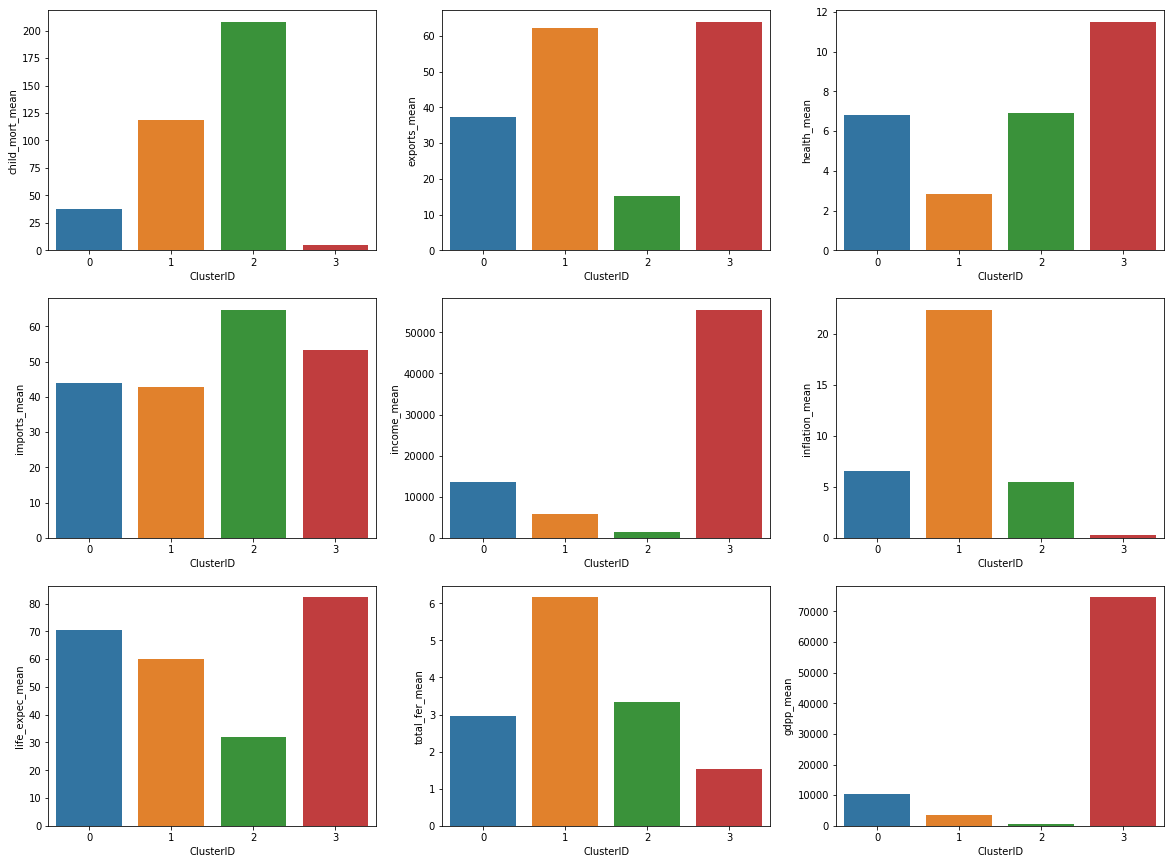

In [79]:
plt.figure(figsize=(20,15))
# subplot 1
plt.subplot(3, 3, 1)
sns.barplot(x=df_hc.ClusterID, y=df_hc.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
sns.barplot(x=df_hc.ClusterID, y=df_hc.exports_mean)

# subplot 3
plt.subplot(3, 3, 3)
sns.barplot(x=df_hc.ClusterID, y=df_hc.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
sns.barplot(x=df_hc.ClusterID, y=df_hc.imports_mean)
plt.subplot(3, 3, 5)
sns.barplot(x=df_hc.ClusterID, y=df_hc.income_mean)
plt.subplot(3, 3, 6)
sns.barplot(x=df_hc.ClusterID, y=df_hc.inflation_mean)
plt.subplot(3, 3, 7)
sns.barplot(x=df_hc.ClusterID, y=df_hc.life_expec_mean)
plt.subplot(3, 3, 8)
sns.barplot(x=df_hc.ClusterID, y=df_hc.total_fer_mean)
plt.subplot(3, 3, 9)
sns.barplot(x=df_hc.ClusterID, y=df_hc.gdpp_mean)

plt.show()

In [80]:
#Perform manual/visual analysis on the outliers countries that were dropped.
merged_pca_hc_whole=pca_hc.merge(country_data,how='right')
merged_pca_hc_whole.head()


,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,0.0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,0.0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0.0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.932423,1.695555,1.525044,0.839625,1.0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,0.0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [81]:
#Getting the outliers which are not considered in cluster
merged_pca_hc_whole.ClusterID.unique()

array([ 0.,  1.,  2.,  3., nan])

In [82]:
#these are 20 countries which are outliers
merged_pca_hc_whole[merged_pca_hc_whole['ClusterID'].isnull()]

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
147,Brunei,NaN,NaN,NaN,NaN,NaN,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
148,Equatorial Guinea,NaN,NaN,NaN,NaN,NaN,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100
149,Kiribati,NaN,NaN,NaN,NaN,NaN,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490
150,Kuwait,NaN,NaN,NaN,NaN,NaN,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
151,Lesotho,NaN,NaN,NaN,NaN,NaN,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170
152,Liberia,NaN,NaN,NaN,NaN,NaN,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327
153,Luxembourg,NaN,NaN,NaN,NaN,NaN,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
154,Malta,NaN,NaN,NaN,NaN,NaN,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
155,"Micronesia, Fed. Sts.",NaN,NaN,NaN,NaN,NaN,40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860
156,Mongolia,NaN,NaN,NaN,NaN,NaN,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650


In [83]:
#we can see all above countries are outliers 
# we can see most of them have good life_expec and some of them are well developed.